### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [44]:
data = pd.read_csv('data/coupons.csv')

In [45]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [46]:
null_data = data.isnull().sum()
print(null_data)


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [47]:
percent_missing = (data.isnull().sum() / len(data)) * 100
print(percent_missing)

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64


In [48]:
# the car column is has the most null values - fill unknown values with placeholder to remove bias and data pre-processing inconsistencies
data['car'] = data['car'].fillna('Unknown')
null_data = data.isnull().sum()
print(null_data)


destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
car                       0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64


In [49]:
# #for all remaining null data in columns, replace all null values with placeholderd
data['Bar'] = data['Bar'].fillna('BlankBar')
data['CoffeeHouse'] = data['CoffeeHouse'].fillna('BlankCoffeeHouse')
data['CarryAway'] = data['CarryAway'].fillna('BlankCarryAway')
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna('BlankRestLessThan20')
data['Restaurant20To50'] = data['Restaurant20To50'].fillna('BlankRest20To50')

null_data = data.isnull().sum()
print(null_data)

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [50]:
#For missing data, I've replaced null values with placeholders 
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,BlankCarryAway,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,BlankCarryAway,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,BlankCarryAway,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,BlankCarryAway,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,BlankCarryAway,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


4. What proportion of the total observations chose to accept the coupon? 



In [51]:
observation_proportion = data['Y'].mean()
print("Proportion of the total observations that've chosen to accept the coupon:", observation_proportion)

Proportion of the total observations that've chosen to accept the coupon: 0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

/var/folders/hq/b_9__f8x695bb07076zx7cq40000gp/T/ipykernel_19472/3247570152.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='coupon', data=data, palette='icefire')


<Axes: xlabel='coupon', ylabel='count'>

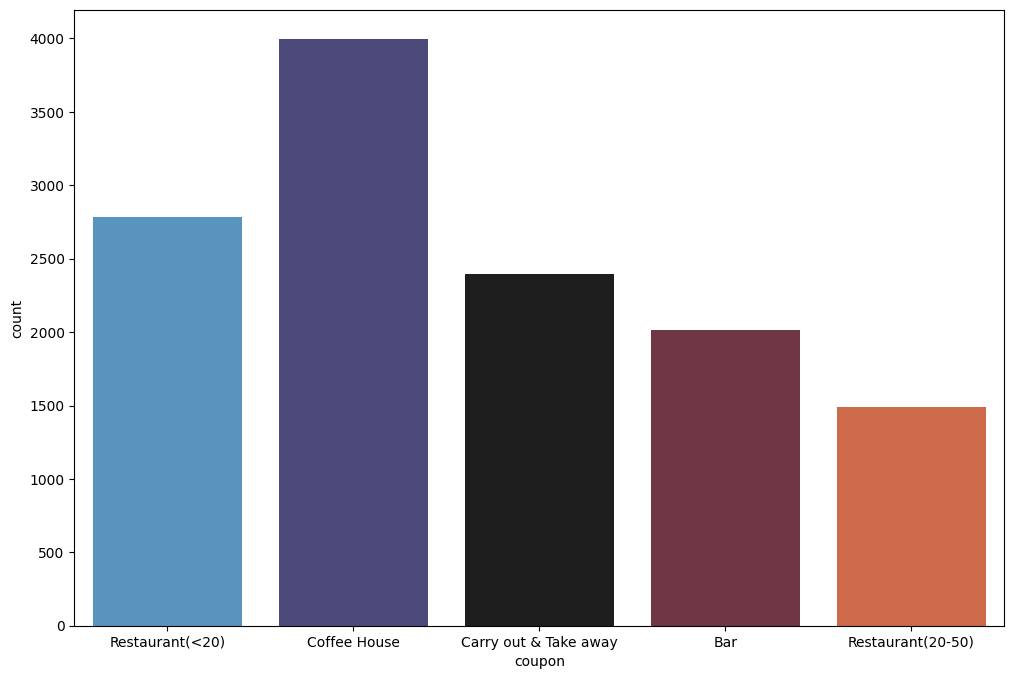

In [52]:
plt.figure(figsize=(12, 8)) 
sns.countplot(x='coupon', data=data, palette='icefire')

6. Use a histogram to visualize the temperature column.

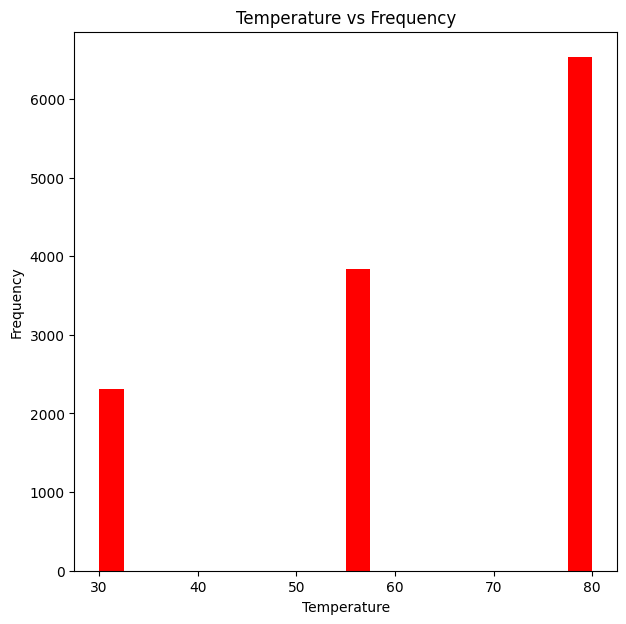

In [53]:
# Visualize temperature column with a histogram 
plt.figure(figsize=(7,7)) 
plt.hist(data['temperature'], bins=20, color='red')

plt.title('Temperature vs Frequency')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [54]:
barcoupons_df = data[data['coupon'] == 'Bar']
#Placeholder currently replace for null values for the following columns: Bar, Coffee House, CarryAway, RestaurantLessThan20, Restaurant20To50

barcoupons_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,BlankCarryAway,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,BlankCarryAway,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,BlankCarryAway,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [55]:
barcoupons_accepted = barcoupons_df['Y'].mean()

print("Proportion of bar coupons accepted:", barcoupons_accepted)

Proportion of bar coupons accepted: 0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [56]:
# Comparing based on 'Bar' column frequency which categorically accomodates for the frequency of visits
three_or_fewer = barcoupons_df[barcoupons_df['Bar'].isin(['never', 'less than once a month', '1–3 times a month'])]
greater_than_three = barcoupons_df[~barcoupons_df['Bar'].isin(['never', 'less than once a month', '1–3 times a month'])]

# Calculate acceptance rates of those who went to a bar 3 or fewer times a month and those who went more.
acceptancerate_three_or_fewer = three_or_fewer['Y'].mean()
acceptancerate_greater_than_three = greater_than_three['Y'].mean()

print("Acceptance rate for those who visit a bar 3 or fewer times a month:", acceptancerate_three_or_fewer)
print("Acceptance rate for those who visit a bar greater than 3 times a month:", acceptancerate_greater_than_three)

Acceptance rate for those who visit a bar 3 or fewer times a month: 0.18795180722891566
Acceptance rate for those who visit a bar greater than 3 times a month: 0.565290648694187


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [57]:
# Drivers who go to a bar more than once a month and are over the age of 25
#annotation gt8 = greater than 8 times
data['age_numeric'] = pd.to_numeric(data['age'], errors='coerce')
drivers_bar_more_than_once = data[(data['Bar'].isin(['2~3', '4~8', 'gt8'])) & (data['age_numeric'] > 25)]

# All other drivers
other_drivers = data[~((data['Bar'].isin(['2~3', '4~8', 'gt8'])) & (data['age_numeric'] > 25))]

# Calculate the acceptance rate for each group
acceptance_rate1 = drivers_bar_more_than_once['Y'].mean()
acceptance_rate2 = other_drivers['Y'].mean()

print(f"Acceptance rate of drivers who go to a bar more than once a month and are over the age of 25: {acceptance_rate1}")
print(f"Acceptance rate for the all other drivers: {acceptance_rate2}")

Acceptance rate of drivers who go to a bar more than once a month and are over the age of 25: 0.6261160714285714
Acceptance rate for the all other drivers: 0.5640481845945029


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [58]:
# Comparing based on 'Bar' column frequency which categorically accomodates for the frequency of visits
# Filter based on passengers that were not a kid and had occupations other than farming, fishing, or forestry.
more_than_once = data['Bar'].isin(['1–3 times a month', '4–8 times a month', 'gt8'])
nokids_passenger = data['passanger'] != 'Kid(s)' 
notfff_occupation = ~data['occupation'].isin(['Farming Fishing & Forestry'])
combined_filter = more_than_once & nokids_passenger & notfff_occupation

# Calculate acceptance rate for combined filter, overall, and other for comparison
combined_filter_acceptancerate = data[combined_filter]['Y'].mean()
complementary_combined_filter_acceptancerate = data[~combined_filter]['Y'].mean()
overall_acceptancerate = data['Y'].mean()

print("Combined filter acceptance rate:", combined_filter_acceptancerate)
print("Combined filter complement acceptance rate:", complementary_combined_filter_acceptancerate)
print("Overall acceptance rate:", overall_acceptancerate)

Combined filter acceptance rate: 0.5714285714285714
Combined filter complement acceptance rate: 0.5683494044242768
Overall acceptance rate: 0.5684326710816777


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [59]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed 
# passanger should be *passenger
drivers_who1 = (data['Bar'].isin(['1–3 times a month', '4–8 times a month', 'gt8'])) & \
               (data['passanger'] != 'Kid(s)') & \
               (data['maritalStatus'] != 'Widowed')

# go to bars more than once a month and are under the age of 30 where age is categorical feature
drivers_who2 = (data['Bar'].isin(['1–3 times a month', '4–8 times a month', 'gt8'])) & \
                    (data['age'].isin(['below21', '21', '22', '23', '24', '25', '26', '27', '28', '29']))  

# go to cheap restaurants more than 4 times a month and income is less than 50K where'income' is categorical feature
drivers_who3 = (data['RestaurantLessThan20'].isin(['4–8 times a month', 'gt8'])) & \
                    (data['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])) 

# Filter each category of drivers by their condition to calculate acceptance rates
acceptancerate_drivers1 = data[drivers_who1]['Y'].mean()
acceptancerate_drivers2 = data[drivers_who2]['Y'].mean()
acceptancerate_drivers3 = data[drivers_who3]['Y'].mean()

print("Acceptance rate for drivers who go to bars more than once a month, had passengers that weren't a kid, and weren't widowed:", acceptancerate_drivers1)
print("Acceptance rate for drivers who go to bars more than once a month and are under the age of 30:", acceptancerate_drivers2)
print("Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K:", acceptancerate_drivers3)

Acceptance rate for drivers who go to bars more than once a month, had passengers that weren't a kid, and weren't widowed: 0.5714285714285714
Acceptance rate for drivers who go to bars more than once a month and are under the age of 30: 0.583969465648855
Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 0.6631892697466468


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

The biggest observations made for drivers who accepted the bar coupons is that young drivers under 30, possibly regular bar-goers, are more likely to use bar coupons because this age range would be more interested in social activities and deals that help them save money while enjoying time with friends. Additionally, drivers who go to cheap restaraunts frequently with income level under $50K would capitalize on cost-saving opportunities and be motivated to accept coupons to get better value from their dining and social experiences within their budget constraints. In general, all drivers who visit bars more frequently would have a more active social life hense suggesting their preference with access to bar coupons as a crowd that enjoys social drinking or dining out regularly. Lastly, those who aren't married with no kids would be another crowd that would frequent or be attracted to bar coupons because they can afford to go out more with less responsibility

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  